In [1]:
# !usr/bin/python
# -*- encoding: utf-8 -*-
# Project: Gated recurrent Unit - GRU 
# Author: Tracy Tao
# Date: 2022/04/13

重置门
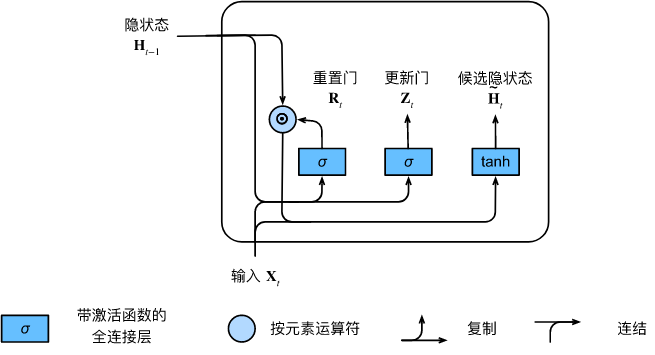
更新门
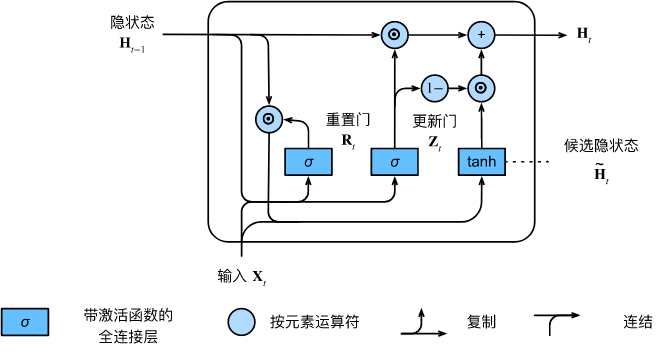

In [5]:
import torch 
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [7]:
def get_params(vocab_size, num_hiddens, device):
    '''
    function: initalize params
    '''
    num_inputs = num_outputs = vocab_size
    def normal(shape):
        return torch.randn(size = shape, device = device) * 0.01 # std = .01
    
    def three():
        return (normal((num_inputs, num_hiddens)),
                normal((num_hiddens, num_hiddens)),
                torch.zeros(num_hiddens, device = device))
    W_xz, W_hz, b_z = three() # 更新门
    W_xr, W_hr, b_r = three() # 重置门
    W_xh, W_hh, b_h = three() # 候选隐状态
    
    W_hq = normal((num_hiddens, num_outputs)) # 输出层参数
    b_q = torch.zeros(num_outputs, device = device)
    
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    
    return params

In [8]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device = device),)

In [9]:
def gru(inputs, state, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state # 隐状态
    outputs = [] 
    for X in inputs:
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_hat = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1-Z) * H_hat
        Y = H @ W_hq + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

In [11]:
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_inputs = vocab_size
gru_layer = nn.GRU(num_inputs, num_hiddens)
model = d2l.RNNModel(gru_layer, len(vocab))
model = model.to(device)

In [12]:
model

RNNModel(
  (rnn): GRU(28, 256)
  (linear): Linear(in_features=256, out_features=28, bias=True)
)

In [13]:
gru_layer

GRU(28, 256)